In [8]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("dna_bench.txt")
df = df.rename(columns={'Score': 'time', 'Score Error (99.9%)':'err', 'Param: N':'N', 'Param: S':'S', 'Param: b':'b', 'Param: modelName':'model'})
df = df[['model','N','S','b','time','err']]
df

,model,N,S,b,time,err
0,StringStrand,100000,100000,10,5.503464,0.366888
1,StringBuilderStrand,100000,100000,10,1.384462,0.081677
2,StringStrand,100000,100000,20,29.169520,3.003548
3,StringBuilderStrand,100000,100000,20,2.910012,0.152909
4,StringStrand,100000,100000,40,172.704555,114.729475
5,StringBuilderStrand,100000,100000,40,5.962782,0.745115


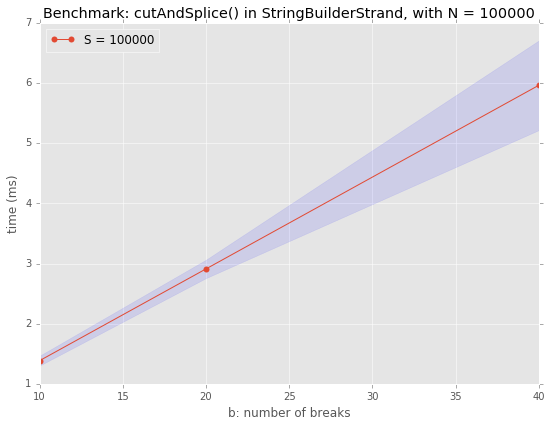

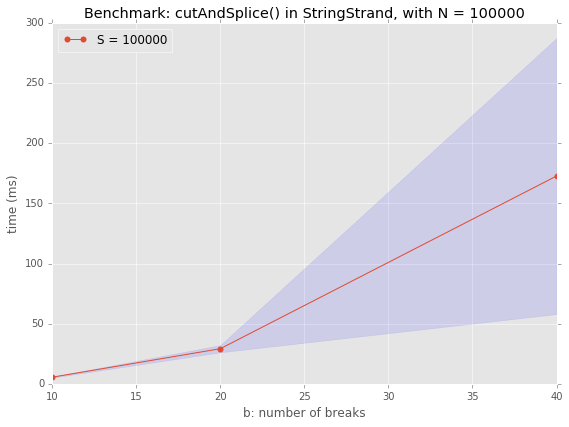

In [62]:
# b as x, S as label

for N, Ngroup in df.groupby('N'):
    for model, group in Ngroup.groupby('model'):
        fig, ax = plt.subplots(figsize=(8,6))
        group = group.sort_values(by='S', ascending=False)
        for S, g in group.groupby('S', sort=False):
            ax.plot(g['b'], g['time'], '-o', label="S = {}".format(S), markeredgecolor='none')
            ax.fill_between(g['b'], g['time']-g['err'], g['time']+g['err'], alpha=0.10, color='blue')
        plt.title("Benchmark: cutAndSplice() in {}, with N = {}".format(model, N))
        plt.xlabel("b: number of breaks")
        plt.ylabel("time (ms)")
        plt.legend(loc=2)
        fig.tight_layout()
        fig.savefig("{}_N{}_xb.pdf".format(model, N))

plt.show()

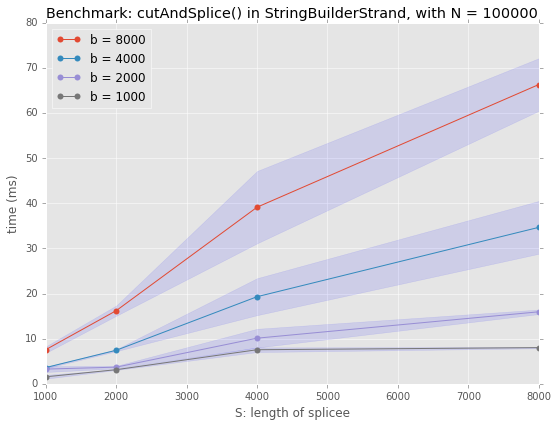

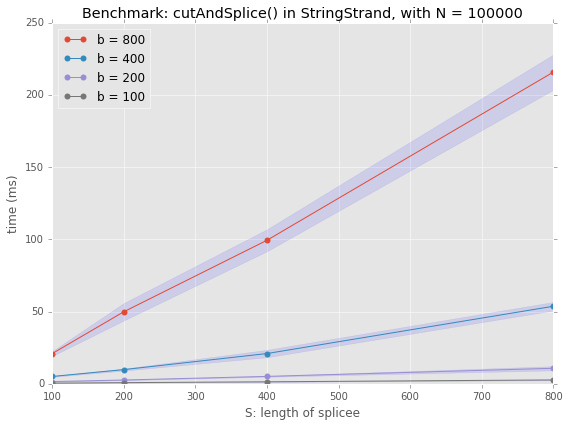

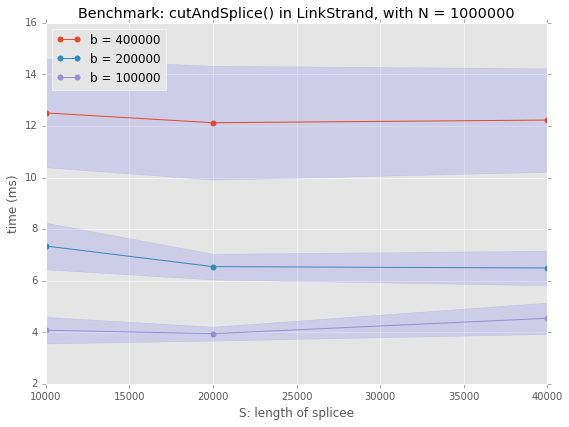

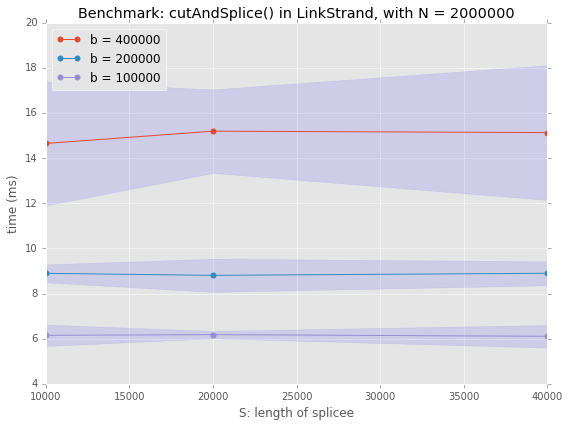

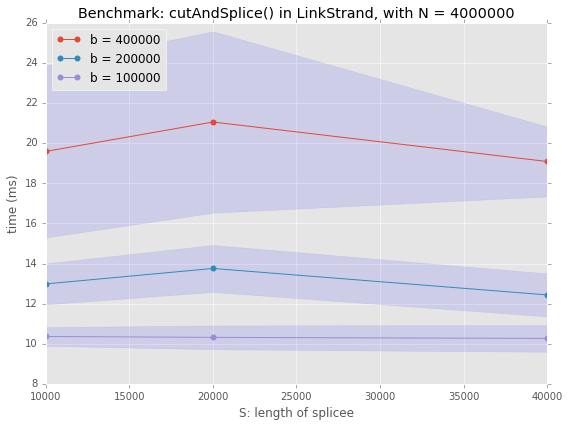

In [46]:
# S as x, b as label

for N, Ngroup in df.groupby('N'):
    for model, group in Ngroup.groupby('model'):
        fig, ax = plt.subplots(figsize=(8,6))
        group = group.sort_values(by='b', ascending=False)
        for b, g in group.groupby('b', sort=False):
            ax.plot(g['S'], g['time'], '-o', label="b = {}".format(b), markeredgecolor='none')
            ax.fill_between(g['S'], g['time']-g['err'], g['time']+g['err'], alpha=0.10, color='blue')
        plt.title("Benchmark: cutAndSplice() in {}, with N = {}".format(model, N))
        plt.xlabel("S: length of splicee")
        plt.ylabel("time (ms)")
        plt.legend(loc=2)
        fig.tight_layout()
        fig.savefig("{}_N{}_xS.pdf".format(model, N))

plt.show()

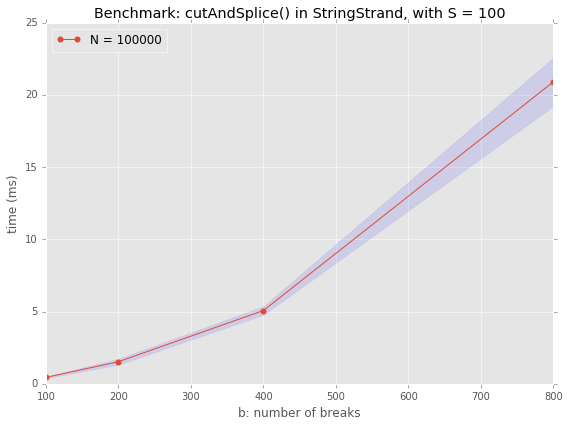

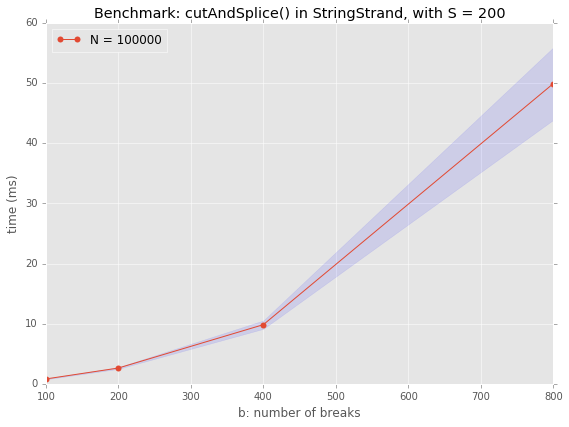

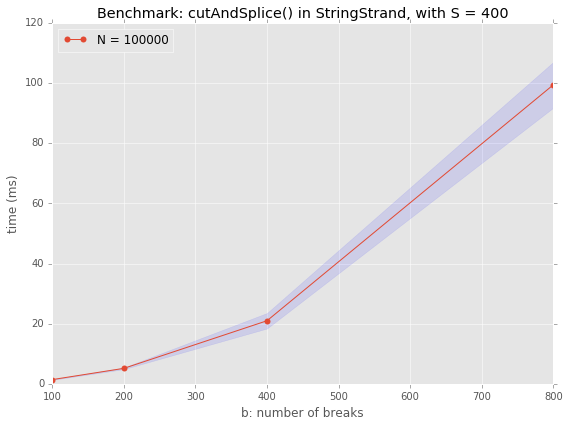

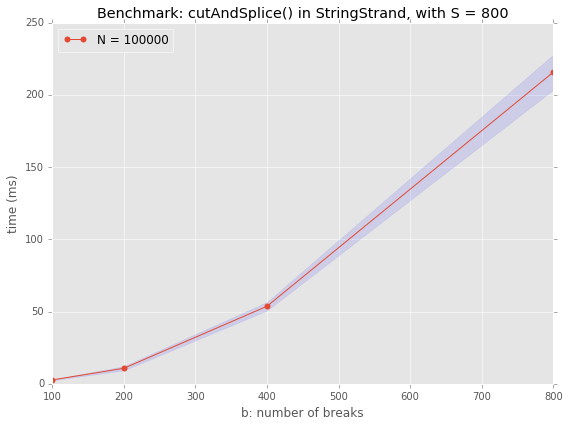

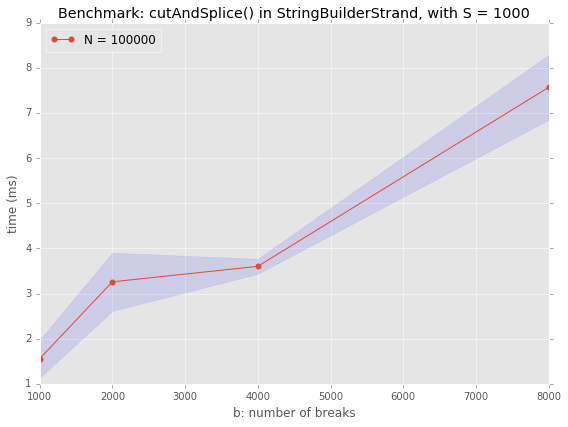

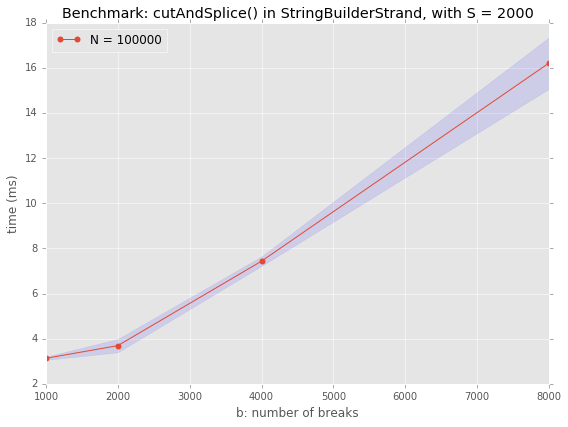

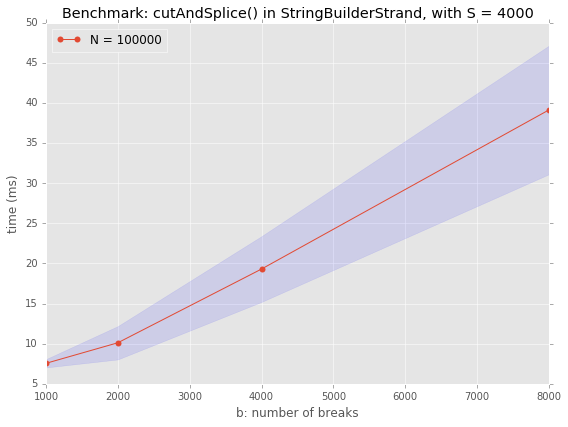

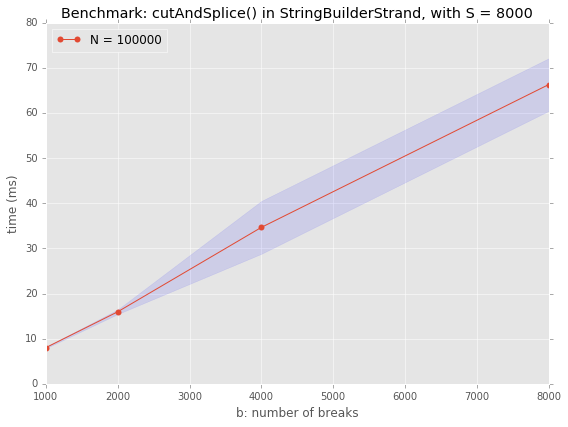

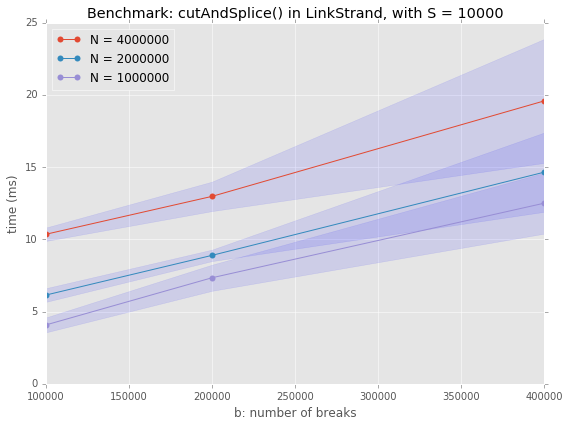

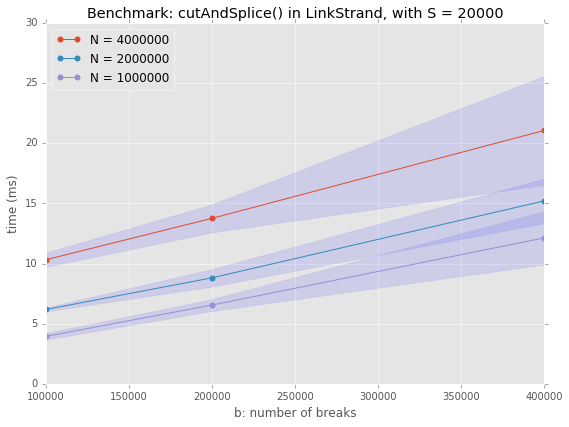

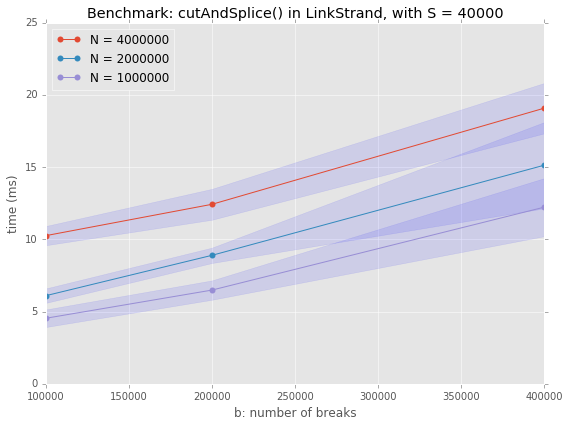

In [53]:
# b as x, N as label

for S, Sgroup in df.groupby('S'):
    for model, group in Sgroup.groupby('model'):
        fig, ax = plt.subplots(figsize=(8,6))
        group = group.sort_values(by='N', ascending=False)
        for N, g in group.groupby('N', sort=False):
            ax.plot(g['b'], g['time'], '-o', label="N = {}".format(N), markeredgecolor='none')
            ax.fill_between(g['b'], g['time']-g['err'], g['time']+g['err'], alpha=0.10, color='blue')
        plt.title("Benchmark: cutAndSplice() in {}, with S = {}".format(model, S))
        plt.xlabel("b: number of breaks")
        plt.ylabel("time (ms)")
        plt.legend(loc=2)
        fig.tight_layout()
        fig.savefig("{}_S{}_xb.pdf".format(model, S))

plt.show()

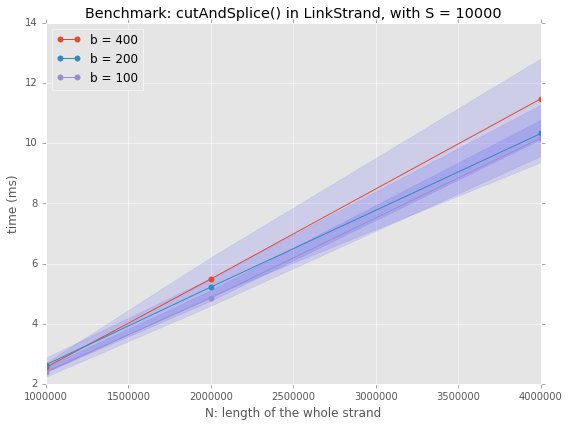

In [56]:
# N as x, b as label

for S, Sgroup in df.groupby('S'):
    for model, group in Sgroup.groupby('model'):
        fig, ax = plt.subplots(figsize=(8,6))
        group = group.sort_values(by='b', ascending=False)
        for b, g in group.groupby('b', sort=False):
            ax.plot(g['N'], g['time'], '-o', label="b = {}".format(b), markeredgecolor='none')
            ax.fill_between(g['N'], g['time']-g['err'], g['time']+g['err'], alpha=0.10, color='blue')
        plt.title("Benchmark: cutAndSplice() in {}, with S = {}".format(model, S))
        plt.xlabel("N: length of the whole strand")
        plt.ylabel("time (ms)")
        plt.legend(loc=2)
        fig.tight_layout()
        fig.savefig("{}_S{}_xN.pdf".format(model, S))

plt.show()